### Importación de Tensorflow

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

### Importación de datos

In [0]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

(x_train, y_train), (x_test, y_test) = fashion_mnist

### Verificando los datos de prueba

In [0]:
y_train.shape

(60000,)

In [0]:
x_train.shape

(60000, 28, 28)

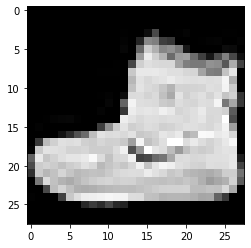

In [0]:
imagendemo = x_train[0]
plt.imshow(imagendemo, cmap = 'gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) 
      for row in img]))

In [0]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0331518615   0   0 2551020   0   0   0   0 255 255   0
   0   0   0   0   0   0   0   0   0   0   0   0 765   0918034680323851581013770   0   0   0 255 7651020   0   0 765
   0   0   0   0   0   0   0   0   0   0   0   01530   02601052020448803417036720313655865   0   0   0   030602550   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   039525601805278545390272853978041055277951632058651963533150183603825
   0   0   0   0   0   0   0   0   0   0   0 255   0175955278556865555905508055080415653238530855311103723035955224404386016830
   0   0   0   0   0   0   0   0   0 255 255 255   0510005

## Preparando los datos para el entrenamiento

La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [0]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32')
x_test = x_test.reshape(-1, 28 * 28).astype('float32')
x_train.shape

(60000, 784)

In [0]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Normalizar los datos [0, 1] para aumentar la velocidad de entrenamiento.

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Las salidas y deben se codificadas en one hot

In [0]:
# Onehot encode
onehot_encoder = OneHotEncoder(sparse = False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [0]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1 = 1024,
               n_nodes_hl2 = 512,
               n_nodes_hl3 = 256,
               n_nodes_hl4 = 128,
               n_classes = 10):
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1), name = "hl1weigths", dtype = "float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1), name = "hl1bias", dtype = "float32")

    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2), name = "hl2weigths", dtype = "float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2), name = "hl2bias", dtype = "float32")

    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3), name = "hl3weigths", dtype = "float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3), name = "hl3bias", dtype = "float32")

    self.h4LW = tf.Variable(np.random.rand(n_nodes_hl3, n_nodes_hl4), name = "hl4weigths", dtype = "float32")
    self.h4LB = tf.Variable(np.random.rand(n_nodes_hl4), name = "hl4bias", dtype = "float32")

    self.outW = tf.Variable(np.random.rand(n_nodes_hl4, n_classes), name = "outweigths", dtype = "float32")
    self.outB = tf.Variable(np.random.rand(n_classes), name = "outbias", dtype = "float32")

    self.trainable_variables =[self.h1LW, self.h1LB, self.h2LW, self.h2LB, self.h3LW, self.h3LB, self.h4LW, self.h4LB, self.outW, self.outB]      
        
  def __call__(self,x): 
      # Declarando la arquitectura
      l1 = tf.add(tf.matmul(x, self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1, self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2, self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      l4 = tf.add(tf.matmul(l3, self.h4LW), self.h4LB)
      l4 = tf.nn.relu(l4)

      output = tf.matmul(l4, self.outW) + self.outB
      return output

In [0]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.92954188e+11, 1.87330019e+11, 1.84199676e+11, 1.81201338e+11,
        1.85269600e+11, 1.89167141e+11, 1.88126724e+11, 2.00019411e+11,
        1.85279873e+11, 1.99400522e+11],
       [1.41006848e+11, 1.36896831e+11, 1.34609224e+11, 1.32418118e+11,
        1.35391101e+11, 1.38239345e+11, 1.37479045e+11, 1.46169987e+11,
        1.35398638e+11, 1.45717690e+11],
       [1.58819107e+11, 1.54189890e+11, 1.51613342e+11, 1.49145420e+11,
        1.52493982e+11, 1.55702018e+11, 1.54845659e+11, 1.64634444e+11,
        1.52502452e+11, 1.64125032e+11],
       [2.33581920e+11, 2.26773565e+11, 2.22984077e+11, 2.19354431e+11,
        2.24279265e+11, 2.28997464e+11, 2.27737993e+11, 2.42134794e+11,
        2.24291750e+11, 2.41385538e+11],
       [1.28326566e+11, 1.24586156e+11, 1.22504282e+11, 1.20510202e+11,
        1.23215839e+11, 1.25807952e+11, 1.25116006e+11, 1.33025399e+11,
        1.23222688e+11, 1.32613784e+11],
       [2.02121511e+11, 1.

Seleccionar un optimizador 

In [0]:
#Adam Optimizer
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001)

### Definir las metricas a usar

In [0]:
#Metricas: Media y Categorical Accuracy
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'test_accuracy')

### Calculo de gradientes y ajuste 

In [0]:
@tf.function
def train_step(model, tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #Funcion de error: Softmax Cross Entropy
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  #Funcion de error: Softmax Cross Entropy
  t_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

## función de entrenamiento  y prueba

In [0]:
def fitting(model, train_x, train_y, test_x, test_y, EPOCHS, N_batch, batch_size):
  for epoch in range(EPOCHS):
    i = 0
    while i + batch_size < len(train_x) or i + batch_size < batch_size * N_batch:
      start = i
      end = i + batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model, batch_x, batch_y)
      i += batch_size

    test_step(model, test_x, test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch + 1, train_loss.result(), train_accuracy.result() * 100, test_loss.result(), test_accuracy.result() * 100))
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [0]:
fitting(DNN, x_train, y_train_onehot, x_test, y_test_onehot, 100, 300, 100)

Epoch 1, Perdida: 0.07993095368146896, Exactitud: 97.59098052978516, Perdida de prueba: 3.9058022499084473, Exactitud de prueba: 86.08000183105469
Epoch 2, Perdida: 0.08252100646495819, Exactitud: 97.43238830566406, Perdida de prueba: 4.426830291748047, Exactitud de prueba: 86.30999755859375
Epoch 3, Perdida: 0.06366273015737534, Exactitud: 97.93822479248047, Perdida de prueba: 4.653422832489014, Exactitud de prueba: 86.29999542236328
Epoch 4, Perdida: 0.06568433344364166, Exactitud: 97.86310577392578, Perdida de prueba: 4.456965446472168, Exactitud de prueba: 85.95999908447266
Epoch 5, Perdida: 0.06440888345241547, Exactitud: 97.89983367919922, Perdida de prueba: 4.696976661682129, Exactitud de prueba: 85.41999816894531
Epoch 6, Perdida: 0.07103408873081207, Exactitud: 97.7412338256836, Perdida de prueba: 5.022397041320801, Exactitud de prueba: 86.06999969482422
Epoch 7, Perdida: 0.06917669624090195, Exactitud: 97.84474182128906, Perdida de prueba: 5.18248987197876, Exactitud de prueb